# Synoptic Case Study

A tutorial on building a case study map with use of MetPy tools. In this tutorial we will cover accessing and plotting, model output, satellite imagery, radar imagery, soundings, and surface observations.

Let's investigate the Chicago Groundhog's Day Blizzard from 2 February 2011.

Model Output: GFS 00 UTC 2 February 2011

Satellite Imagery: GOES East 00 UTC 2 February 2011

Radar Imagery: KLOT nearest 00 UTC 2 February 2011

Soundings: KILX, KGRB 00 UTC 2 February 2011

Surface Obs: 00 UTC 2 February 2011

Dependencies:
- numpy <=1.11
- metpy 0.5.1+ (latest repo)
- caropty
- scipy
- matplotlib
- siphon
- datetime
- netCDF4
- pandas

## Model Output

There are a number of different sites that you can utilize to access past model output analyses and even forecasts. The most robust collection is housed at the National Center for Environmental Information (NCEI, formerly NCDC) on a THREDDS server. The general website to begin your search is

https://www.ncdc.noaa.gov/data-access

this link contains links to many different data sources (some of which we will come back to later in this tutorial). But for now, lets investigate what model output is avaiable

https://www.ncdc.noaa.gov/data-access/model-data/model-datasets

The gridded model output that are available

**Reanalysis**
 * Climate Forecast System Reanalysis (CFSR)
   * CFSR provides a global reanalysis (a best estimate of the observed state of the atmosphere) of past weather from January 1979 through March 2011 at a horizontal resolution of 0.5°.
 * North American Regional Reanalysis (NARR)
   * NARR is a regional reanalysis of North America containing temperatures, winds, moisture, soil data, and dozens of other parameters at 32km horizontal resolution.
 * Reanalysis-1 / Reanalysis-2 (R1/R2)
   * Reanalysis-1 / Reanalysis-2 are two global reanalyses of atmospheric data spanning 1948/1979 to present at a 2.5° horizontal resolution.

**Numerical Weather Prediction**
 * Climate Forecast System (CFS) 
   * CFS provides a global reanalysis, a global reforecast of past weather, and an operational, seasonal forecast of weather out to nine months.
 * Global Data Assimilation System (GDAS)
   * GDAS is the set of assimilation data, both input and output, in various formats for the Global Forecast System model.
 * Global Ensemble Forecast System (GEFS)
   * GEFS is a global-coverage weather forecast model made up of 21 separate forecasts, or ensemble members, used to quantify the amount of uncertainty in a forecast. GEFS produces output four times a day with weather forecasts going out to 16 days.
 * Global Forecast System (GFS)
   * The GFS model is a coupled weather forecast model, composed of four separate models which work together to provide an accurate picture of weather conditions. GFS covers the entire globe down to a horizontal resolution of 28km.
 * North American Mesoscale (NAM)
   * NAM is a regional weather forecast model covering North America down to a horizontal resolution of 12km. Dozens of weather parameters are available from the NAM grids, from temperature and precipitation to lightning and turbulent kinetic energy.
 * Rapid Refresh (RAP)
   * RAP is a regional weather forecast model of North America, with separate sub-grids (with different horizontal resolutions) within the overall North America domain. RAP produces forecasts every hour with forecast lengths going out 18 hours.  RAP replaced the Rapid Update Cycle (RUC) model on May 1, 2012.
 * Navy Operational Global Atmospheric Prediction System (NOGAPS)
   * NOGAPS analysis data are available in six-hourly increments on regularly spaced latitude-longitude grids at 1-degree and one-half-degree resolutions. Vertical resolution varies from 18 to 28 pressure levels, 34 sea level depths, the surface, and other various levels.

**Ocean Models**
 * Hybrid Coordinate Ocean Model (HYCOM), Global
   * The Navy implementation of HYCOM is the successor to Global NCOM. This site hosts regions covering U.S. coastal waters as well as a global surface model.
 * Navy Coastal Ocean Model (NCOM), Global
   * Global NCOM was run by the Naval Oceanographic Office (NAVOCEANO) as the Navy’s operational global ocean-prediction system prior to its replacement by the Global HYCOM system in 2013. This site hosts regions covering U.S., European, West Pacific, and Australian coastal waters as well as a global surface model.
 * Navy Coastal Ocean Model (NCOM), Regional
   * The Regional NCOM is a high-resolution version of NCOM for specific areas. NCEI serves the Americas Seas, U.S. East, and Alaska regions of NCOM.
 * Naval Research Laboratory Adaptive Ecosystem Climatology (AEC)
   * The Naval Research Laboratory AEC combines an ocean model with Earth observations to provide a synoptic view of the typical (climatic) state of the ocean for every day of the year. This dataset covers the Gulf of Mexico and nearby areas.
 * National Centers for Environmental Prediction (NCEP) Real Time Ocean Forecast System (RTOFS)–Atlantic
   * RTOFS–Atlantic is a data-assimilating nowcast-forecast system operated by NCEP. This dataset covers the Gulf of Mexico and most of the northern and central Atlantic.

**Climate Prediction**
 * CM2 Global Coupled Climate Models (CM2.X)
   * CM2.X consists of two climate models to model the changes in climate over the past century and into the 21st century.
 * Coupled Model Intercomparison Project Phase 5 (CMIP5) (link is external)
   * The U.N. Intergovernmental Panel on Climate Change (IPCC) coordinates global analysis of climate models under the Climate Model Intercomparison Project (CMIP). CMIP5 is in its fifth iteration. Data are available through the Program for Climate Model Diagnosis and Intercomparison (PCMDI) website.
   
**Derived / Other Model Data**
 * Service Records Retention System (SRRS)
   * SRRS is a store of weather observations, summaries, forecasts, warnings, and advisories generated by the National Weather Service for public use.
 * NOMADS Ensemble Probability Tool
   * The NOMADS Ensemble Probability Tool allows a user to query the Global Ensemble Forecast System (GEFS) to determine the probability that a set of forecast conditions will occur at a given location using all of the 21 separate GEFS ensemble members.
 * National Digital Forecast Database (NDFD)
   * NDFD are gridded forecasts created from weather data collected by National Weather Service field offices and processed through the National Centers for Environmental Prediction. NDFD data are available by WMO header or by date range.
 * National Digital Guidance Database (NDGD)
   * NDGD consists of forecasts, observations, model probabilities, climatological normals, and other digital data that complement the National Digital Forecast Database.

### GFS Output

Lets investigate what specific GFS output is available to work with from NCEI.

https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

We specifically want to look for data that has "TDS" data access, since that is short for a THREDDS server data access point. There are a total of four different GFS datasets that we could potentially use.

**GFS Analysis**

| Model | Grid/Scale | Period of Record | Model Cycle | Output Timestep | Data Access Links |
|:---:|:---:|:---:|:---:|:---:|:---:|
| GFS-ANL | 004 (0.5º) - Domain | 01Jan2007–Present | 4/day: 00, 06, 12, 18UTC | +00, (+03, +06 precipitation fields) | FTP HTTPS TDS HAS
| GFS-ANL | 003 (1º) - Domain | 02Mar2004–Present | 4/day: 00, 06, 12, 18UTC | +00, (+03, +06 precipitation fields) | FTP HTTPS TDS HAS

**GFS Forecasts**

| Model | Grid/Scale | Period of Record | Model Cycle | Output Timestep | Data Access Links |
|:---:|:---:|:---:|:---:|:---:|:---:|
| GFS | 004 (0.5º) - Domain | 10Oct2006–Present (approx. two years to present online) | 4/day: 00, 06, 12, 18UTC | 3-hourly, +000 to +192 hours | FTP HTTPS TDS HAS
| GFS | 003 (1º) - Domain | 15Feb2005–Present (approx. 6mo to present online) | 4/day: 00, 06, 12, 18UTC | 3-hourly, +000 to +240 hours; 12-hourly, +252 to +384 | FTP HTTPS TDS HAS

**Choosing our data source**

Let's go ahead and use the GFS Analysis data to investigate the past case we identified (Chicago Groundhogs Day Blizzard 2011), so let's use the GFS-ANL 004 dataset.

https://nomads.ncdc.noaa.gov/thredds/catalog/gfs-004-anl/201102/20110202/catalog.html?dataset=gfs-004-anl/201102/20110201/gfsanl_4_20110201_0000_000.grb2

And we will use a python package called Siphon to read this data through the NetCDFSubset (NetCDFServer) link.

https://nomads.ncdc.noaa.gov/thredds/ncss/grid/gfs-004-anl/201102/20110202/gfsanl_4_20110202_0000_000.grb2/dataset.html

In [1]:
from siphon.ncss import NCSS

ncss = NCSS('https://nomads.ncdc.noaa.gov/thredds/ncss/grid/gfs-004-anl/201102/20110202/gfsanl_4_20110202_0000_000.grb2')

ncss.variables

{'Absolute_vorticity',
 'Best_Lifted_Index',
 'Cloud_mixing_ratio',
 'Cloud_water',
 'Convective_available_potential_energy',
 'Convective_available_potential_energy_surface',
 'Convective_inhibition',
 'Convective_inhibition_surface',
 'Field_Capacity',
 'Geopotential_height',
 'Geopotential_height_anomaly',
 'Geopotential_height_highest_tropospheric_freezing',
 'Geopotential_height_maximum_wind',
 'Geopotential_height_potential_vorticity_surface',
 'Geopotential_height_surface',
 'Geopotential_height_tropopause',
 'Geopotential_height_zeroDegC_isotherm',
 'ICAO_Standard_Atmosphere_Reference_Height',
 'ICAO_Standard_Atmosphere_Reference_Height_tropopause',
 'Ice_cover_Proportion',
 'Land_cover_1land_2sea',
 'N5-Wave_Geopotential_Height',
 'N5-Wave_Geopotential_Height_Anomaly',
 'Ozone_Mixing_Ratio',
 'Planetary_Boundary_Layer_Height',
 'Potential_temperature',
 'Precipitable_water',
 'Pressure',
 'Pressure_maximum_wind',
 'Pressure_reduced_to_MSL',
 'Pressure_surface',
 'Pressure_trop

There are a lot of different parameters that we could plot, but let's go ahead and make a relatively standard four panel plot.

- UL: 300-hPa heights and wind speed
- UR: 500-hPa heights and absolute vorticity
- LL: 850-hPa heights, temperature, and wind barbs
- LR: MSLP, 1000-500 hPa Thickness

So we'll need the following variables from the GFS file

* Temperature
* Geopotential_height
* U-component_of_wind
* V-component_of_wind
* Pressure_reduced_to_MSL

We'll compute Absolute Vorticity, Wind Speed, and Thickness from these variables. (Note: we could have used the absolute vorticity available from the GFS too.)

**Set up our data query to get what we need.**

In [2]:
from datetime import datetime

query = ncss.query()

query.variables('Temperature',
                'Geopotential_height',
                'U-component_of_wind',
                'V-component_of_wind',
                'Pressure_reduced_to_MSL')
query.time(datetime(2011,2,2,0))
query.add_lonlat()
query.lonlat_box(north=60,south=15,west=-140,east=-50)

data = ncss.get_data(query)

print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    Originating_center: US National Weather Service - NCEP(WMC) (7)
    Generating_Model: Analysis from GFS
    Product_Status: Operational products
    Product_Type: Forecast products
    title: US National Weather Service - NCEP(WMC) Analysis from GFS Forecast products
    institution: Center US National Weather Service - NCEP(WMC) (7)
    source: Type: Forecast products Status: Operational products
    history: Direct read of GRIB-2 into NetCDF-Java 4 API
    CF:feature_type: GRID
    file_format: GRIB-2
    location: /nomads3_data/raid2/noaaport/merged/gfsanl/201102/20110202/gfsanl_4_20110202_0000_000.grb2
    _CoordinateModelRunDate: 2011-02-02T00:00:00Z
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (NetcdfCFWriter)
Original Dataset = /nomads3_data/raid2/noaaport/merged/gfsanl/201102/20110202/gfsanl_4_20110202_0000_000.grb2; Translation Date =

The result of our query gives us a netCDF-like data object that we can then further parse for our specific variables.

### Select Variables and find units

In [3]:
temp_var = data.variables['Temperature']
print('Temp units = ',temp_var.units)

hght_var = data.variables['Geopotential_height']
print('Height units = ',hght_var.units)

uwnd_var = data.variables['U-component_of_wind']
print('Uwind units = ',uwnd_var.units)

vwnd_var = data.variables['V-component_of_wind']
print('Vwind units = ',vwnd_var.units)

mslp_var = data.variables['Pressure_reduced_to_MSL']
print('MSLP units = ',mslp_var.units)

Temp units =  K
Height units =  gpm
Uwind units =  m s-1
Vwind units =  m s-1
MSLP units =  Pa


### Find dimension names for time and vertical level

In [4]:
dtime = temp_var.dimensions[0]
dlev  = temp_var.dimensions[1]

print(dlev, 'level units = ',data.variables[dlev].units)

pressure level units =  Pa


In [5]:
from netCDF4 import num2date
import numpy as np

# Set lat/lon values from data
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]

# Make lat and lon 2D, if necessary
if (lat.ndim < 2):
    lon, lat = np.meshgrid(lon, lat)

# Find index values for pressure levels
levs = data.variables[dlev][:]
lev_1000 = np.where(levs == 1000*100)[0][0]
lev_850 = np.where(levs == 850*100)[0][0]
lev_500 = np.where(levs == 500*100)[0][0]
lev_300 = np.where(levs == 300*100)[0][0]

# Get time into a better format
times = data.variables[dtime]
vtimes = num2date(times[:], units=times.units)

### Get Variable Data and add Units

In [6]:
from metpy.units import units

hght_1000 = hght_var[0,lev_1000] * units.meter
mslp = mslp_var[0] * units(mslp_var.units)
mslp_hPa = mslp.to('hPa')

hght_850 = hght_var[0,lev_850] * units.meter
tmpk_850 = temp_var[0,lev_850] * units.K
tmpc_850 = tmpk_850.to('degC')
uwnd_850 = uwnd_var[0,lev_850] * units('m/s')
vwnd_850 = vwnd_var[0,lev_850] * units('m/s')

hght_500 = hght_var[0,lev_500] * units.meter
uwnd_500 = uwnd_var[0,lev_500] * units('m/s')
vwnd_500 = vwnd_var[0,lev_500] * units('m/s')

hght_300 = hght_var[0,lev_300] * units.meter
uwnd_300 = uwnd_var[0,lev_300] * units('m/s')
vwnd_300 = vwnd_var[0,lev_300] * units('m/s')

In [7]:
# Helper function to calculate distance between lat/lon points
# to be used in differencing calculations
def calc_dx_dy(longitude,latitude,shape='sphere',radius=6370997.):
    ''' This definition calculates the distance between grid points that are in
        a latitude/longitude format.
        
        Using pyproj GEOD; different Earth Shapes
        https://jswhit.github.io/pyproj/pyproj.Geod-class.html
        
        Common shapes: 'sphere', 'WGS84', 'GRS80'
        
        Accepts, 1D or 2D arrays for latitude and longitude
        
        Assumes [Y, X] for 2D arrays
        
        Returns: dx, dy; 2D arrays of distances between grid points 
                 in the x and y direction with units of meters 
    '''
    import numpy as np
    from metpy.units import units
    from pyproj import Geod
    
    if (radius != 6370997.):
        g = Geod(ellps=shape, a=radius, b=radius)
    else:
        g = Geod(ellps=shape)
    
    if (latitude.ndim == 1):
        longitude, latitude = np.meshgrid(longitude,latitude)
    
    dy = np.zeros(latitude.shape)
    dx = np.zeros(longitude.shape)
        
    _, _, dy[:-1,:] = g.inv(longitude[:-1,:],latitude[:-1,:],longitude[1:,:],latitude[1:,:])
    dy[-1,:] = dy[-2,:]
    
    _, _, dx[:,:-1] = g.inv(longitude[:,:-1],latitude[:,:-1],longitude[:,1:],latitude[:,1:])
    dx[:,-1] = dx[:,-2]
    
    xdiff_sign = np.sign(longitude[0,1]-longitude[0,0])
    ydiff_sign = np.sign(latitude[1,0]-latitude[0,0])
    return xdiff_sign*dx*units.meter, ydiff_sign*dy*units.meter

### Calculations

Metpy has a host of calculations that work on 2D grids including,
- Vertical Vorticity: v_vorticity
- Divergence: h_convergence
- Wind Speed: get_wind_speed
- Geostrophic Wind: geostrophic_wind
- Shearing Deformation: shearing_deforamtion
- Stretching Deformation: stretching_deformation
- Wind Components: get_wind_components
- Potential Temperature: potential_temperature
- Dewpoint from RH: dewpoint_rh

Full List: https://unidata.github.io/MetPy/api/generated/metpy.calc.html

**Absolute Vorticity**

$\eta_a = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y} + f$

$f = 2\Omega sin(\phi)$

**Wind Speed**

$WSPD = \sqrt{u^2 + v^2}$

In [8]:
from metpy.calc import v_vorticity, get_wind_speed, coriolis_parameter

dx, dy = calc_dx_dy(lon, lat)

f = coriolis_parameter(np.deg2rad(lat)).to('1/s')

vor_500 = v_vorticity(uwnd_500, vwnd_500, dx, dy, dim_order='yx')

avor_500 = vor_500 + f

wspd_300 = get_wind_speed(uwnd_300, vwnd_300).to('knots')

## Set up Map

Use cartopy module for plotting data on a georeferenced map.

http://scitools.org.uk/cartopy/docs/latest/index.html

General Lat/Lon Projection: PlateCarree

Good Mid-latitude Projection for plotting: LambertConformal

In [9]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# Data projection
# GFS data is lat/lon so need PlateCarree
dataproj = ccrs.PlateCarree()

# Plot projection
# The look you want for the view, LambertConformal for mid-latitude view
plotproj = ccrs.LambertConformal(central_longitude=-100, central_latitude=45,
                                 standard_parallels=[30,60])

# Use shapefiles from http://www.naturalearthdata.com/downloads/
# to plot state and country borders
states_provinces = cfeat.NaturalEarthFeature(category='cultural',
                                             name='admin_1_states_provinces_lakes',
                                             scale='50m',
                                             facecolor='none')

country_borders = cfeat.NaturalEarthFeature(category='cultural',
                                            name='admin_0_countries', 
                                            scale='50m',
                                            facecolor='none')

# Simple definition to create axes and map background features
def map_background(num):
    ax = plt.subplot(num, projection=plotproj)
    ax.set_extent([-124,-72,20,54], ccrs.Geodetic())
    ax.add_feature(states_provinces, edgecolor='black', linewidth=1)
    ax.add_feature(country_borders, edgecolor='black', linewidth=1)
    return ax

### Four Panel Plot

Creating a four panel plot allows for a lot of information to be conveyed in a single image. Although a bit more involved to plot, the result is worth the effort.

The key to the panel plot is using matplotlibs subplots method, summarized below.

Use plt.subplots(nrows, ncols, plot_num)
- UL ax1: plt.subplots(221)
- UR ax2: plt.subplots(222)
- LL ax3: plt.subplots(223)
- LR ax4: plt.subplots(224)

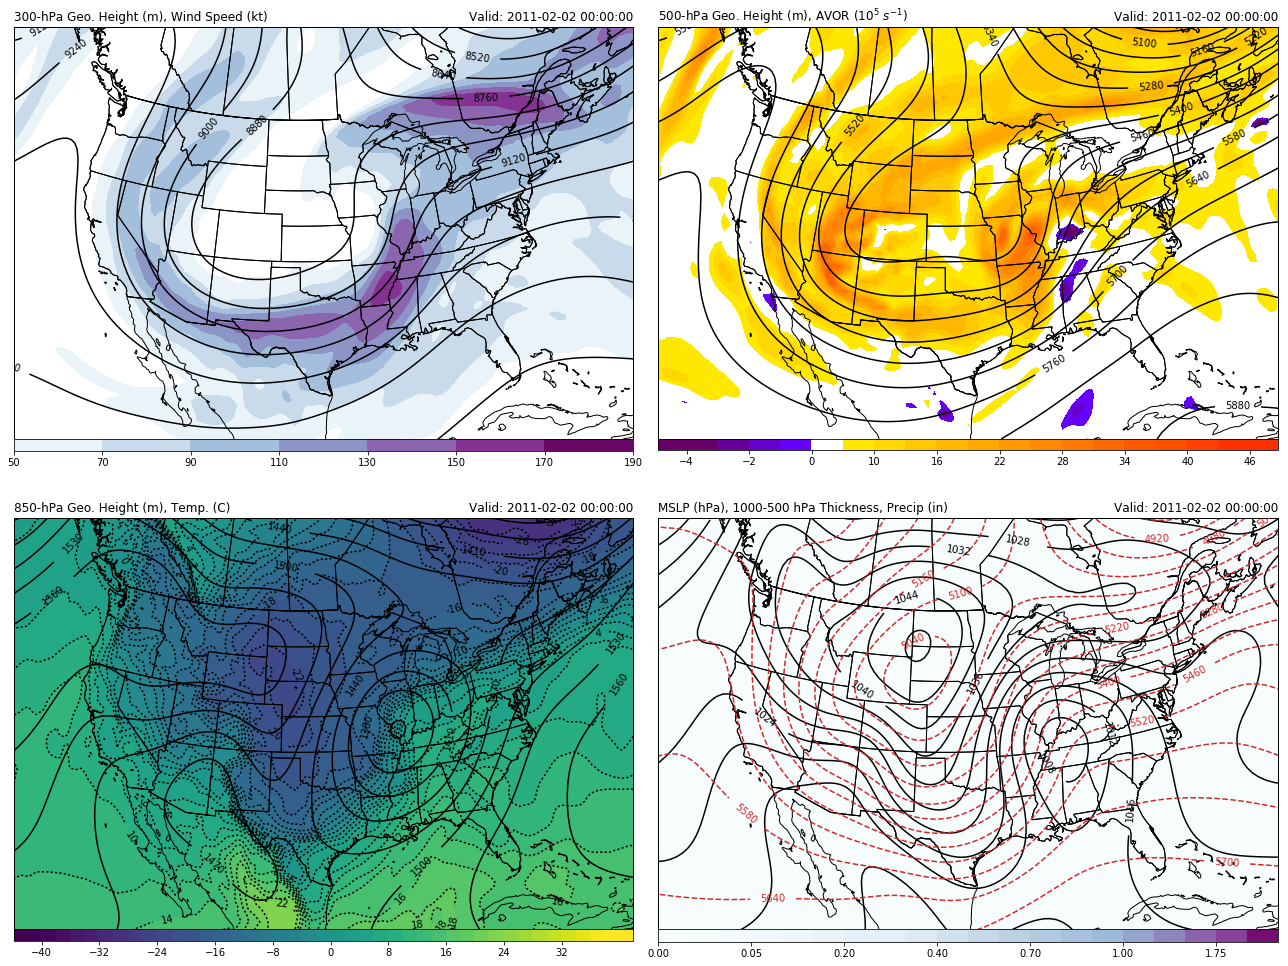

In [10]:
from scipy.ndimage import gaussian_filter

fig = plt.figure(figsize=(18,14.2))


# Upper-Left Panel 300 hPa
ax1 = map_background(221)
ax1.set_title('300-hPa Geo. Height (m), Wind Speed (kt)', loc='left')
ax1.set_title('Valid: {}'.format(vtimes[0]), loc='right')
cs1 = ax1.contour(lon, lat, gaussian_filter(hght_300, sigma=5),
                  np.arange(0,11000,120), colors='black', transform=dataproj)
plt.clabel(cs1, fontsize=10, inline=1, inline_spacing=5,
           fmt='%i', rightside_up=True, use_clabeltext=True)
cf1 = ax1.contourf(lon, lat, wspd_300.to('knots'), np.arange(50,200,20), cmap=plt.cm.BuPu, transform=dataproj)
plt.colorbar(cf1, orientation='horizontal', pad=0, aspect=50, use_gridspec=True)

# Upper-right Panel 500 hPa
ax2 = map_background(222)
clevavor500 = [-4,-3,-2,-1,0,7,10,13,16,19,22,25,28,31,34,37,40,43,46]
colorsavor500 = ('#660066', '#660099', '#6600CC', '#6600FF', 'w', '#ffE800', '#ffD800',
                 '#ffC800', '#ffB800', '#ffA800', '#ff9800', '#ff8800', '#ff7800',
                 '#ff6800', '#ff5800', '#ff5000', '#ff4000', '#ff3000')
ax2.set_title(r'500-hPa Geo. Height (m), AVOR ($10^5$ $s^{-1}$)', loc='left')
ax2.set_title('Valid: {}'.format(vtimes[0]), loc='right')
cs2 = ax2.contour(lon, lat, gaussian_filter(hght_500, sigma=5),
                  np.arange(0,6500,60), colors='black', transform=dataproj)
plt.clabel(cs2, fontsize=10, inline=1, inline_spacing=5,
           fmt='%i', rightside_up=True, use_clabeltext=True)
cf2 = ax2.contourf(lon, lat, avor_500*1e5, clevavor500, colors=colorsavor500, extend='both', transform=dataproj)
plt.colorbar(cf2, orientation='horizontal', pad=0, aspect=50, extendrect=True, use_gridspec=True)

# Lower-left Panel 850 hPa
ax3 = map_background(223)
ax3.set_title('850-hPa Geo. Height (m), Temp. (C)', loc='left')
ax3.set_title('Valid: {}'.format(vtimes[0]), loc='right')
cs3 = ax3.contour(lon, lat, gaussian_filter(hght_850, sigma=5),
                  np.arange(0,6500,30), colors='black', transform=dataproj)
plt.clabel(cs3, fontsize=10, inline=1, inline_spacing=10,
           fmt='%i', rightside_up=True, use_clabeltext=True)
cf3 = ax3.contourf(lon, lat, tmpc_850, np.arange(-40,40,2), extend='both', transform=dataproj)
plt.colorbar(cf3, orientation='horizontal', pad=0, aspect=50, extendrect=True, use_gridspec=True)
cs6 = ax3.contour(lon, lat, tmpc_850, np.arange(-40,40,2), colors='black', linestyles='dotted', transform=dataproj)
plt.clabel(cs6, fontsize=10, inline=1, inline_spacing=5,
           fmt='%i', rightside_up=True, use_clabeltext=True)

# Lower-right Panel surface
ax4 = map_background(224)
clevprecip = [0,0.01,0.03,0.05,0.10,0.15,0.20,0.25,0.30,0.40,0.50,
              0.60,0.70,0.80,0.90,1.00,1.25,1.50,1.75,2.00,2.50]
ax4.set_title('MSLP (hPa), 1000-500 hPa Thickness, Precip (in)', loc='left')
ax4.set_title('Valid: {}'.format(vtimes[0]), loc='right')
cs4 = ax4.contour(lon, lat, gaussian_filter(mslp_hPa, sigma=5),
                  np.arange(0,1100,4), colors='black', transform=dataproj)
plt.clabel(cs4, fontsize=10, inline=1, inline_spacing=10,
           fmt='%i', rightside_up=True, use_clabeltext=True)
cf4 = ax4.contourf(lon, lat, np.zeros_like(hght_500), clevprecip, cmap=plt.cm.BuPu, transform=dataproj)
plt.colorbar(cf4, orientation='horizontal', pad=0, aspect=50, use_gridspec=True)
cs5 = ax4.contour(lon, lat, gaussian_filter(hght_500-hght_1000, sigma=5),
                  np.arange(0,6000,60), colors='tab:red', linestyles='dashed', transform=dataproj)
plt.clabel(cs5, fontsize=10, inline=1, inline_spacing=5,
           fmt='%i', rightside_up=True, use_clabeltext=True)



plt.tight_layout()
plt.show()

## Satellite Data

NOAA has a large collection of past satellite data available in a variety of formats (McIDAS AREA, netCDF, JPG, GIF, RAW), but it needs to be ordered and then obtained either via FTP or HTTP. The link that takes you directly to searching for GOES data is 

https://www.class.ngdc.noaa.gov/saa/products/search?datatype_family=GVAR_IMG

This example uses data obtained in netCDF format, which is only possible if you set up an account (its free!) and changing the users preferences for how you want data type. Currently (26 April 2017) there is not a way to read the AREA files, but that should change by the end of 2017.

Unfortunately, the netCDF files provided by this CLASS service does not contain a lot of metadata, but the website does contain that information if you search for it.

BAND 1: Visible <br>
BAND 3: Water Vapor, 6.5 um <br>
BAND 4: Infrared, 10.7 um 


### Reading netCDF files

To read a netCDF file we will use the netcdf4 module with the Dataset method. This allows for easy access to netCDF files in the python environment.

In [11]:
from netCDF4 import Dataset

# Data is located in local working directory
ds = Dataset('goes13.2011.032.233148.BAND_01.nc')

# print file metadata
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    Source: McIDAS Area File
    Satellite Sensor: G-13 IMG    
    dimensions(sizes): xc(8504), yc(3531), time(1), auditCount(2), auditSize(80)
    variables(dimensions): int32 version(), int32 sensorID(), int32 imageDate(), int32 imageTime(), int32 startLine(), int32 startElem(), int32 time(time), int32 dataWidth(), int32 lineRes(), int32 elemRes(), int32 prefixSize(), int32 crDate(), int32 crTime(), int32 bands(), |S1 auditTrail(auditCount,auditSize), float32 data(time,yc,xc), float32 lat(yc,xc), float32 lon(yc,xc)
    groups: 



**Important Missing Metadata**

Projection: Geostationary

http://www.ospo.noaa.gov/Operations/GOES/status.html

Central Longitude of GOES-13 Satellite: $-75^{\circ}$ East <br>
Central Longitude of GOES-15 Satellite: $-135^{\circ}$ East <br>

Missing Value for lat/lon: 2.1432893e+09

Data is in raw count format, not 10-bit GVAR. Currently only showing raw count allowing matplotlib to determine appropriate norm values and using a grey-scale colormap.

### Visible Satellite Imagery

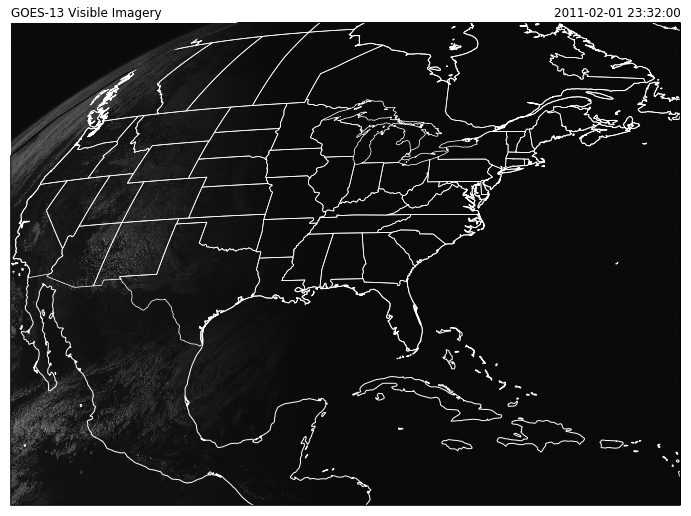

In [12]:
# Visible data
vis_data = ds.variables['data']

# Get time and convert to datetime object
sattime = ds.variables['time']
vsattime = num2date(sattime[:], units=sattime.units)

# Set up satellite projection
proj = ccrs.Geostationary(central_longitude=-75)

# Get lat/lons and mask values in space
lon = np.ma.masked_values(ds.variables['lon'][:],2.1432893e+09)
lat = np.ma.masked_values(ds.variables['lat'][:],2.1432893e+09)

# Find exent of image in lat/lon
ilon_min = np.unravel_index(np.argmin(lon),lon.shape)
ilon_max = np.unravel_index(np.argmax(lon),lon.shape)
ilat_min = np.unravel_index(np.argmin(lat),lat.shape)
ilat_max = np.unravel_index(np.argmax(lat),lat.shape)

# Convert extent to projection coords
LONpt0 = proj.transform_point(lon[ilon_min],lat[ilon_min],ccrs.Geodetic())
LONpt1 = proj.transform_point(lon[ilon_max],lat[ilon_max],ccrs.Geodetic())
LATpt0 = proj.transform_point(lon[ilat_min],lat[ilat_min],ccrs.Geodetic())
LATpt1 = proj.transform_point(lon[ilat_max],lat[ilat_max],ccrs.Geodetic())

# Start Visible Satellite Image
fig = plt.figure(2, figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Set titles
ax.set_title('GOES-13 Visible Imagery', loc='left')
ax.set_title(vsattime[0], loc='right')

# Acutal satellite plot
im = ax.imshow(vis_data[0,:,:]/100, origin='upper', extent=(LONpt0[0],LONpt1[0],LATpt0[1],LATpt1[1]),
               cmap='Greys_r', norm = plt.Normalize(0,255))

# Add state borders and coastlines
ax.coastlines(resolution='50m', color='white', linewidth=0.75)
ax.add_feature(states_provinces,edgecolor='white', linewidth=0.75)

plt.show()

### Water Vapor Satellite Imagery

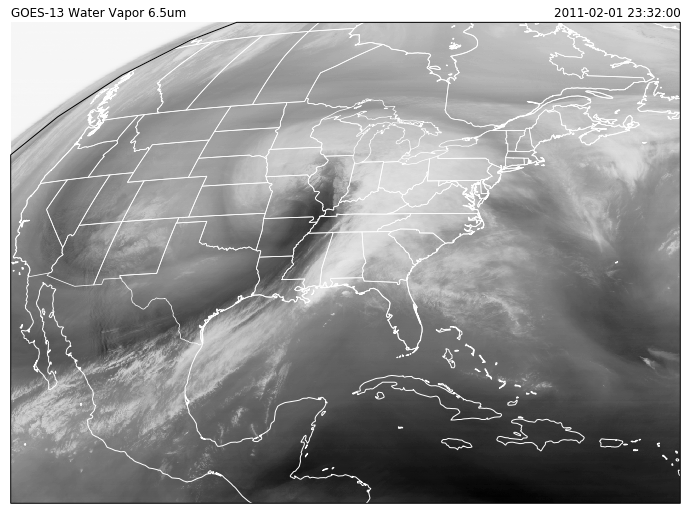

In [13]:
# 6.5um Water Vapor is BAND 3
ds = Dataset('goes13.2011.032.233148.BAND_03.nc')

# Grab Water Vapor Data
WV_data = ds.variables['data']

# Get time and convert to datetime object
sattime = ds.variables['time']
vsattime = num2date(sattime[:], units=sattime.units)

# Get lat/lons and mask values in space
# Need to do this again, because resolution change, resulting
# in a different number of points
lon = np.ma.masked_values(ds.variables['lon'][:],2.1432893e+09)
lat = np.ma.masked_values(ds.variables['lat'][:],2.1432893e+09)

# Find exent of image in lat/lon
ilon_min = np.unravel_index(np.argmin(lon),lon.shape)
ilon_max = np.unravel_index(np.argmax(lon),lon.shape)
ilat_min = np.unravel_index(np.argmin(lat),lat.shape)
ilat_max = np.unravel_index(np.argmax(lat),lat.shape)

# Convert extent to projection coords
LONpt0 = proj.transform_point(lon[ilon_min],lat[ilon_min],ccrs.Geodetic())
LONpt1 = proj.transform_point(lon[ilon_max],lat[ilon_max],ccrs.Geodetic())
LATpt0 = proj.transform_point(lon[ilat_min],lat[ilat_min],ccrs.Geodetic())
LATpt1 = proj.transform_point(lon[ilat_max],lat[ilat_max],ccrs.Geodetic())

# Start Water Vapor Satellite Image
fig = plt.figure(3, figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Set titles
ax.set_title('GOES-13 Water Vapor 6.5um', loc='left')
ax.set_title(vsattime[0], loc='right')

# Plot water vapor data
im = ax.imshow(WV_data[0,:,:]/100, origin='upper', extent=(LONpt0[0],LONpt1[0],LATpt0[1],LATpt1[1]),
               cmap='Greys')

# Plot state borders and coastlines
ax.coastlines(resolution='50m', color='white', linewidth=0.75)
ax.add_feature(states_provinces,edgecolor='white', linewidth=0.75)

plt.show()

### Infrared Satellite Imagery

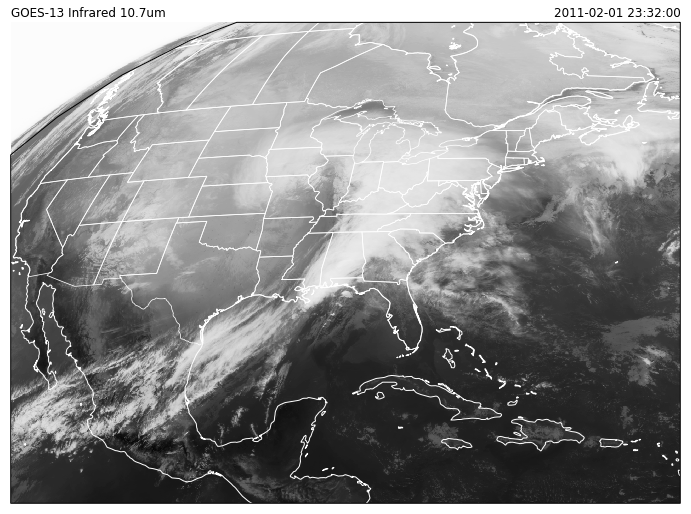

In [14]:
# 10.7um Water Vapor is BAND 4
ds = Dataset('goes13.2011.032.233148.BAND_04.nc')

# Grab Infrared Data
IR_data = ds.variables['data']

# Get time and convert to datetime object
sattime = ds.variables['time']
vsattime = num2date(sattime[:], units=sattime.units)

# Get lat/lons and mask values in space
# Need to do this again, because resolution change, resulting
# in a different number of points
lon = np.ma.masked_values(ds.variables['lon'][:],2.1432893e+09)
lat = np.ma.masked_values(ds.variables['lat'][:],2.1432893e+09)

# Find exent of image in lat/lon
ilon_min = np.unravel_index(np.argmin(lon),lon.shape)
ilon_max = np.unravel_index(np.argmax(lon),lon.shape)
ilat_min = np.unravel_index(np.argmin(lat),lat.shape)
ilat_max = np.unravel_index(np.argmax(lat),lat.shape)

# Convert extent to projection coords
LONpt0 = proj.transform_point(lon[ilon_min],lat[ilon_min],ccrs.Geodetic())
LONpt1 = proj.transform_point(lon[ilon_max],lat[ilon_max],ccrs.Geodetic())
LATpt0 = proj.transform_point(lon[ilat_min],lat[ilat_min],ccrs.Geodetic())
LATpt1 = proj.transform_point(lon[ilat_max],lat[ilat_max],ccrs.Geodetic())

# Start Water Vapor Satellite Image
fig = plt.figure(3, figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Set titles
ax.set_title('GOES-13 Infrared 10.7um', loc='left')
ax.set_title(vsattime[0], loc='right')

# Plot infrared data
im = ax.imshow(IR_data[0,:,:]/100, origin='upper', extent=(LONpt0[0],LONpt1[0],LATpt0[1],LATpt1[1]),
               cmap='Greys')

# Plot state borders and coastlines
ax.coastlines(resolution='50m', color='white', linewidth=0.75)
ax.add_feature(states_provinces,edgecolor='white', linewidth=0.75)

plt.show()

## Radar Data

Currently it is easy to access past nexrad imagery with the Big Data initiative between NOAA and Amazon Web Services (AWS). The entire archive is available at the following link from .edu domains.

https://s3.amazonaws.com/noaa-nexrad-level2/index.html

The EDU community can also access this data archive (and realtime data) from a THREDDS server

http://thredds-aws.unidata.ucar.edu/thredds/catalog/nexrad/level2/S3/catalog.html

I downloaded the Level 2 Nexrad file for the scan nearest to 00 UTC 2 February 2011 from the AWS S3 archive and saved it locally.


### Nexrad File Reading

**metpy**
https://unidata.github.io/MetPy/api/generated/metpy.io.html
- File readers for level2 and level3 data
 - Level2File
 - Level3File

**pyart**
http://arm-doe.github.io/pyart-docs-travis/
- Developed at Argonne National Laboratory
 - Easy install through conda
 - larger file read capabilities
 - many plotting and radar analysis functionality

In [15]:
from metpy.io import Level2File

# Use metpy reader for level 2 data
raddata = Level2File('KLOT20110202_000026_V03')

# Valid Time
radtime = raddata.dt
print(radtime)

# Pull data out of the file
sweep = 0

# First item in ray is header, which has azimuth angle
az = np.array([ray[0].az_angle for ray in raddata.sweeps[sweep]])

# 5th item is a dict mapping a var name (byte string) to a tuple
# of (header, data array)
ref_hdr = raddata.sweeps[sweep][0][4][b'REF'][0]
ref_range = np.arange(ref_hdr.num_gates) * ref_hdr.gate_width + ref_hdr.first_gate
ref = np.array([ray[4][b'REF'][1] for ray in raddata.sweeps[sweep]])

# Get radar site lat/lon
lat_0 = raddata.sweeps[0][0][1].lat
lon_0 = raddata.sweeps[0][0][1].lon

2011-02-02 00:00:28


Need to get lat/lon values to plot with a map in projected coordiantes

Use pyproj module to back out lat/lons from derived x,y coordinate values

In [16]:
def get_lonlat(x, y, nex_lon, nex_lat):
    from pyproj import Proj

    p = Proj(proj='aeqd', ellps='sphere',
             lon_0=nex_lon,
             lat_0=nex_lat)

    return p(x,y,inverse=True)

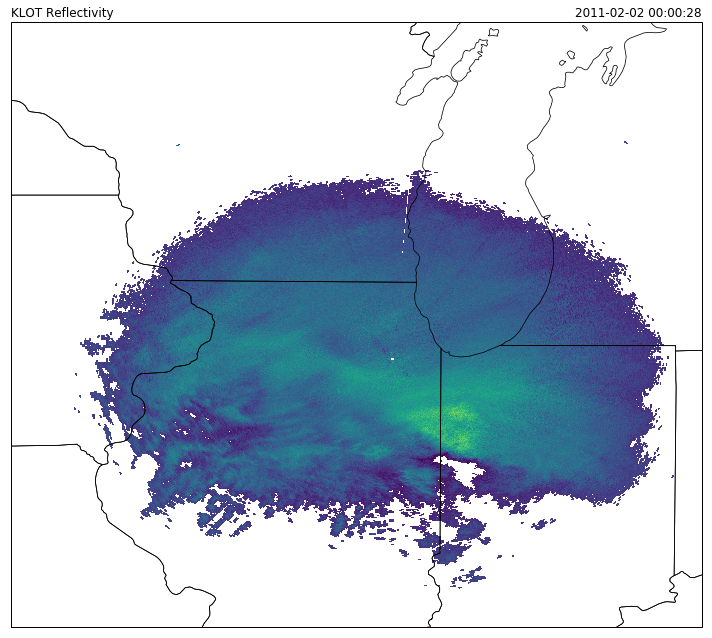

In [17]:
from metpy.plots import ctables

# Turn into an array, then mask
data = np.ma.array(ref)
data[np.isnan(data)] = np.ma.masked

# Convert az,range to x,y
xlocs = ref_range * np.sin(np.deg2rad(az[:, np.newaxis])) * 1000
ylocs = ref_range * np.cos(np.deg2rad(az[:, np.newaxis])) * 1000

# Get lat/lon values from x,y and center lon/lat
lon, lat = get_lonlat(xlocs, ylocs, lon_0, lat_0)

# Plot the data
fig = plt.figure(5, figsize=(10,12))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Set titles
ax.set_title('KLOT Reflectivity', loc='left')
ax.set_title(radtime, loc='right')

# Plot radar data with a colormap from metpy
cmap = ctables.registry.get_colortable('viridis')
ax.pcolormesh(lon, lat, data, cmap=cmap)

# Limit graphics area extent
ax.set_extent([-92.5,-84.5,38.5,45.5],ccrs.PlateCarree())

# Plot state borders
hiresstates = cfeat.NaturalEarthFeature(category='cultural',
                                        name='admin_1_states_provinces_lakes',
                                        scale='10m',
                                        facecolor='none')

ax.add_feature(hiresstates,edgecolor='black', linewidth=0.75)

plt.tight_layout()
plt.show()

## Sounding Data

There are two great repositories for upperair sounding data, both of which can be read in using metpy.

The function from metpy is `get_upper_air_data` and there are three inputs: datetime object, station ID, data location.

**Wyoming**
```python
data = get_upper_air_data(datetime(2017,4,4,12), 'ILX', 'wyoming')
```

**Iowa State**
```python
data = get_upper_air_data(datetime(2017,4,24,0), 'GRB', 'iastate')
```

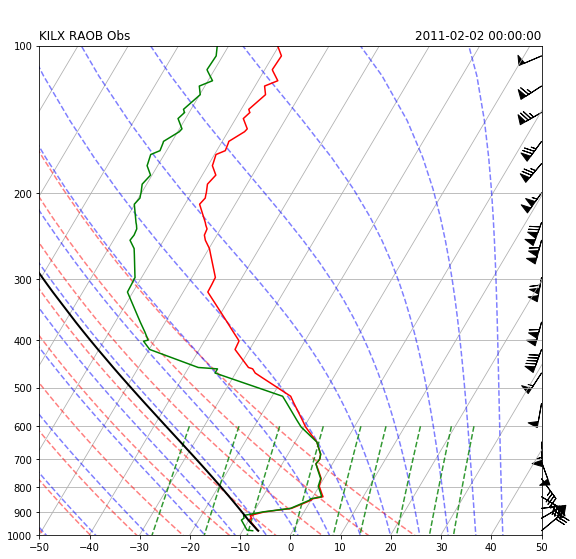

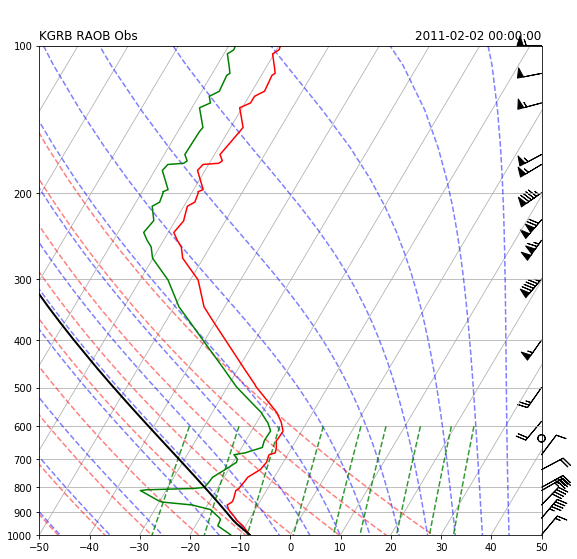

In [18]:
from metpy.io import get_upper_air_data
from metpy.plots import SkewT
from metpy.calc import parcel_profile

# Set values for desire date/time
year = 2011
month = 2
day = 2
hour = 0

# Get data and make plots for two stations with data coming from Univ. of Wyoming
for sound_stn in ['ILX', 'GRB']:
    # Get data with metpy function 'get_upper_air_data'
    data = get_upper_air_data(datetime(year,month,day,hour),sound_stn,'wyoming')
    
    # Parse out Temperature (T), Dewpoint (Td), Pressure (p),
    # U-component of wind (u), V-component of wind (v)
    T = data.variables['temperature'][:]
    Td = data.variables['dewpoint'][:]
    p = data.variables['pressure'][:]
    u = data.variables['u_wind'][:]
    v = data.variables['v_wind'][:]

    # Change default to be better for skew-T
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    skew.plot(p, T, 'r')
    skew.plot(p, Td, 'g')
    skew.plot_barbs(p[::4], u[::4], v[::4])

    # Add the relevant special lines
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    skew.plot_mixing_lines()
    skew.ax.set_ylim(1000, 100)

    # Calculate full parcel profile and add to plot as black line
    # Requires that the variables have associated units
    prof = parcel_profile(p, T[0], Td[0]).to('degC')
    skew.plot(p, prof, 'k', linewidth=2)

    # Make some titles
    plt.title('K'+sound_stn+' RAOB Obs',loc='left')
    plt.title(datetime(year,month,day,hour), loc='right')

    # Show the plot
    plt.show()

## Surface Data

There is not currently an easy way to access past surface data that has been archived in a readily read format, such as netCDF. However, there is a way to download data from Iowa State (see sample script at bottom) and save it locally as a comma separated file. Then this file can be read in using the Pandas module and grouped to get the appropriate data.

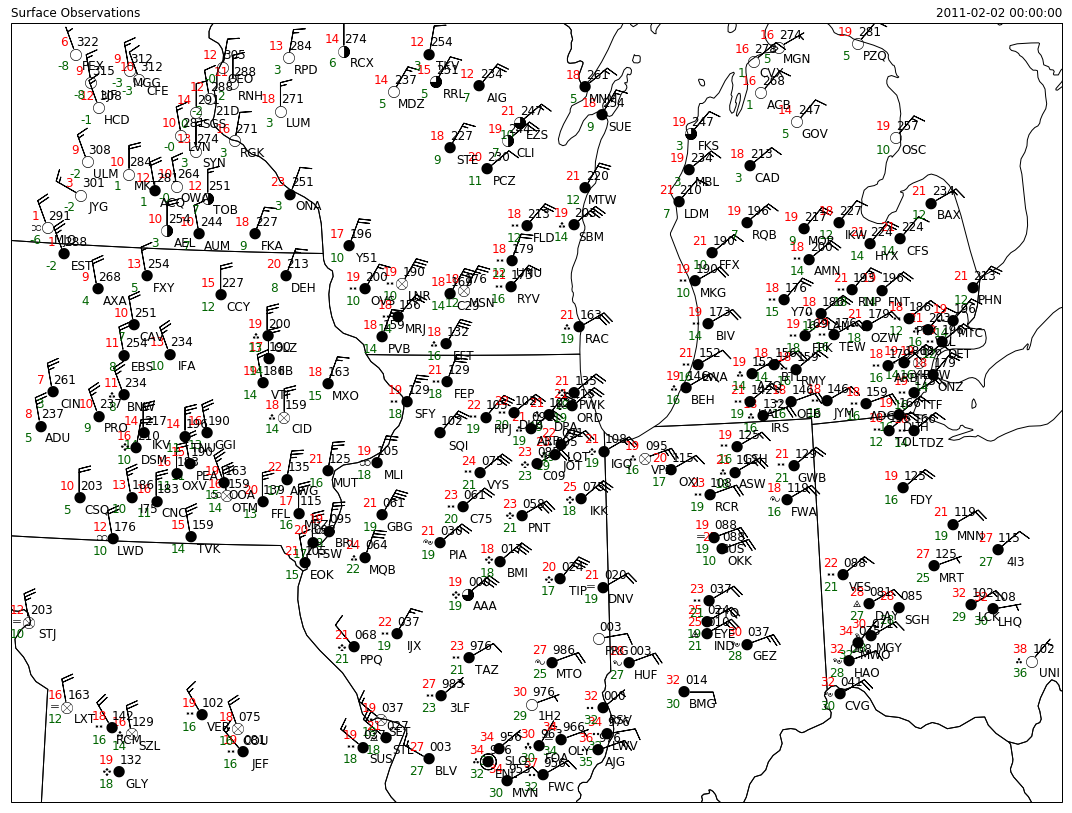

In [19]:
import pandas as pd
from metpy.calc import get_wind_components
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover

# Read surface data from file, skipping first five lines and using the fifth as the header
# Remove any spaces after commas and make missing values ('M') into np.nan
sfcdata = pd.read_csv('sfc_obs_201102020000_201102020000.txt', header=5,
                      skipinitialspace=True, na_values='M')

# Convert string date field ('valid') to datetime objects with Pandas method to_datetime
sfcdata['valid'] = pd.to_datetime(sfcdata['valid'])

# Masking our data for only times between 0000 and 0030 UTC
LLlon = -95
LLlat = 38
URlon = -82
URlat = 45.5
mask_time = (sfcdata['valid'] >= datetime(2011,2,2,0,0)) & (sfcdata['valid'] < datetime(2011,2,2,0,30))
mask_lon = ((sfcdata['lon'] > LLlon) & (sfcdata['lon'] < URlon))
mask_lat = ((sfcdata['lat'] < URlat) & (sfcdata['lat'] > LLlat+.25))
mask = mask_time&mask_lon&mask_lat

# Only keep sfc data where mask is True
sfcdata = sfcdata.loc[mask]

# Group by station and select first one (which should be closest to 0000 UTC)
gb = sfcdata.groupby('station')
sfc_stn_00 = gb.head(1)

# Pull out variables
stid = sfc_stn_00['station'].values
st_lon = sfc_stn_00['lon'].values
st_lat = sfc_stn_00['lat'].values
tmpf = sfc_stn_00['tmpf'].values * units.degF
dwpf = sfc_stn_00['dwpf'].values * units.degF
alti = (sfc_stn_00['alti'].values * units('in Hg')).to('hPa')
u, v = get_wind_components(sfc_stn_00['sknt'].values * units('knots'),
                           sfc_stn_00['drct'].values * units.degree)

# Decode present weather
present_wx = sfc_stn_00['presentwx']
wx_text = present_wx.fillna(value='M')
wx_codes = {'': 0, 'HZ': 5, 'BR': 10, '-DZ': 51, 'DZ': 53, '+DZ': 55, 'M': 0, 'UP': 0, '-SNPL': 79,
            '-FZRA': 66, 'FZRA': 67, '-FZDZPL': 56, '+PL': 79, 'PL': 79, '-RA': 61, 'RA': 63,
            '+RA': 65, '-SN': 71, 'SN': 73, '+SN': 75, 'FZFG': 5, 'BLSN': 0, 'np.nan': 0}
wx = [wx_codes[s.split()[0] if ' ' in s else s] for s in wx_text]

# Decode skycover
skycover = [[sfc_stn_00['skyc1'].fillna(value='M').values],
            [sfc_stn_00['skyc2'].fillna(value='M').values],
            [sfc_stn_00['skyc3'].fillna(value='M').values],
            [sfc_stn_00['skyc4'].fillna(value='M').values]]
skyc_codes = {'SKC': 0, 'CLR': 0, 'FEW': 2, 'SCT': 4, 'BKN': 6, 'OVC': 8, 'VV ': 9, 'M': 0}
skyc = np.array([skyc_codes[s] for j in range(4) for s in skycover[j][0]])
skyc = skyc.reshape((4, len(sfc_stn_00['skyc1'])))
skyc = np.max(skyc,axis=0)

# Set up projection for surface data plot
sfcproj = ccrs.LambertConformal(central_longitude=-90, central_latitude=45,
                                standard_parallels=[30,60])

# Create the figure and an axes set to the projection
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=sfcproj)

# Set plot bounds
ax.set_extent([LLlon,URlon,LLlat,URlat], ccrs.PlateCarree())

# Set titles
ax.set_title('Surface Observations', loc='left')
ax.set_title(datetime(2011,2,2,0), loc='right')

# Add some various map elements to the plot to make it recognizable
ax.add_feature(states_provinces, edgecolor='black')

# Here's the actual station plot

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, st_lon, st_lat, transform=ccrs.PlateCarree(),
                          fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', tmpf, color='red')
stationplot.plot_parameter('SW', dwpf, color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', alti.m,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', skyc, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', wx, current_weather)

# Add wind barbs
stationplot.plot_barb(u, v, transform=ccrs.PlateCarree())

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((1.5, -1), stid)

plt.tight_layout()
plt.show()